#Lab | Predicting Claim Amount with ML Linear Regression Week2

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df1= pd.read_csv("marketing_customer_analysis.csv")
df1.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
print (df1.shape) 

(9134, 24)


In [6]:
df1.columns.to_list()

['Customer',
 'State',
 'Customer Lifetime Value',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Income',
 'Location Code',
 'Marital Status',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Total Claim Amount',
 'Vehicle Class',
 'Vehicle Size']

In [8]:
def standardize_col(col):
    return col.replace(" ", "_")

In [31]:
for col in df1.columns.to_list():
    print(standardize_col(col))

State
Customer_Lifetime_Value
Coverage
Education
Effective_To_Date
EmploymentStatus
Gender
Income
Location_Code
Marital_Status
Monthly_Premium_Auto
Months_Since_Last_Claim
Months_Since_Policy_Inception
Number_of_Open_Complaints
Number_of_Policies
Policy_Type
Policy
Renew_Offer_Type
Sales_Channel
Total_Claim_Amount
Vehicle_Class
Vehicle_Size


In [11]:
df1=df1.dropna()

In [13]:
df1.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9134 entries, 0 to 9133
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          9134 non-null   object 
 1   Customer Lifetime Value        9134 non-null   float64
 2   Coverage                       9134 non-null   object 
 3   Education                      9134 non-null   object 
 4   Effective To Date              9134 non-null   object 
 5   EmploymentStatus               9134 non-null   object 
 6   Gender                         9134 non-null   object 
 7   Income                         9134 non-null   int64  
 8   Location Code                  9134 non-null   object 
 9   Marital Status                 9134 non-null   object 
 10  Monthly Premium Auto           9134 non-null   int64  
 11  Months Since Last Claim        9134 non-null   int64  
 12  Months Since Policy Inception  9134 non-null   i

In [15]:
df1.isna().sum() 

State                            0
Customer Lifetime Value          0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [17]:
for c in df1.columns.tolist():   
    print(c, len(df1[c].unique()))

State 5
Customer Lifetime Value 8041
Coverage 3
Education 5
Effective To Date 59
EmploymentStatus 5
Gender 2
Income 5694
Location Code 3
Marital Status 3
Monthly Premium Auto 202
Months Since Last Claim 36
Months Since Policy Inception 100
Number of Open Complaints 6
Number of Policies 9
Policy Type 3
Policy 9
Renew Offer Type 4
Sales Channel 4
Total Claim Amount 5106
Vehicle Class 6
Vehicle Size 3


In [21]:
cat_cols=[col for col in df1.columns if (df1[col].dtype==object)]

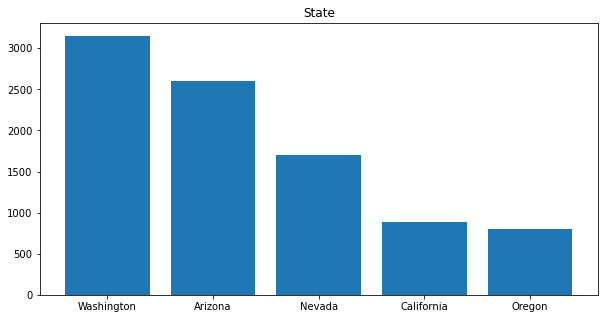

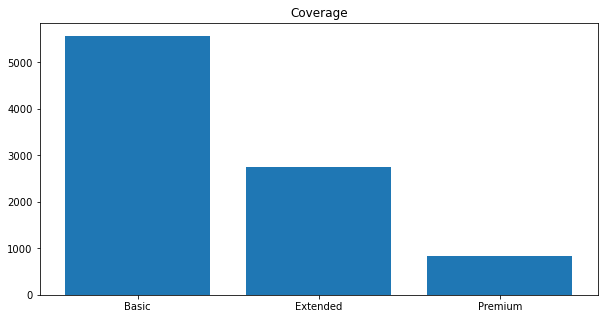

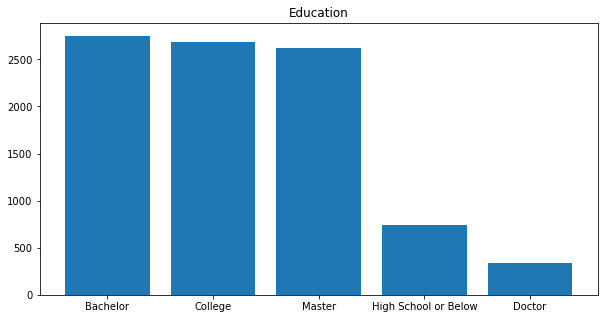

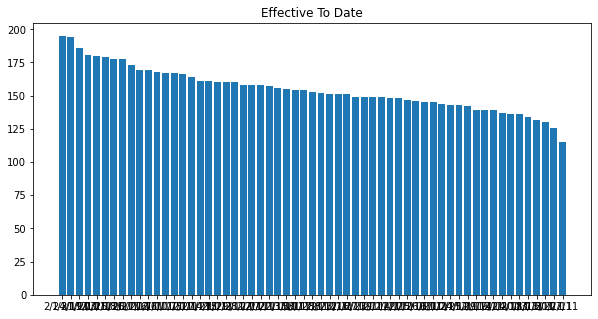

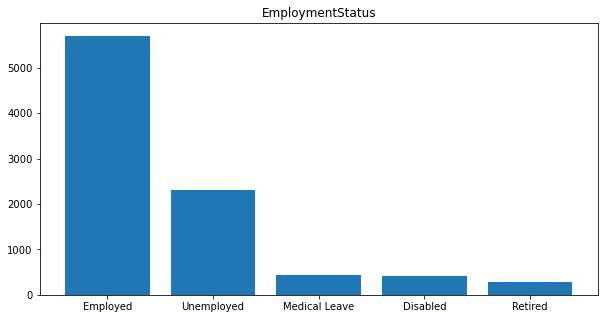

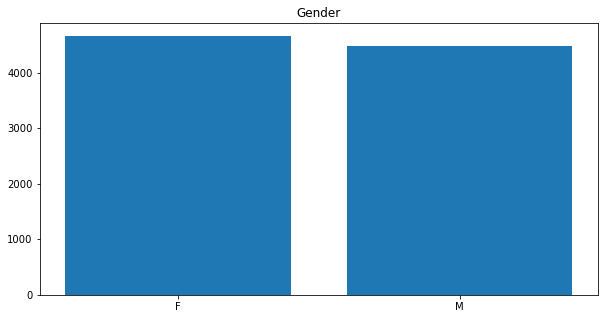

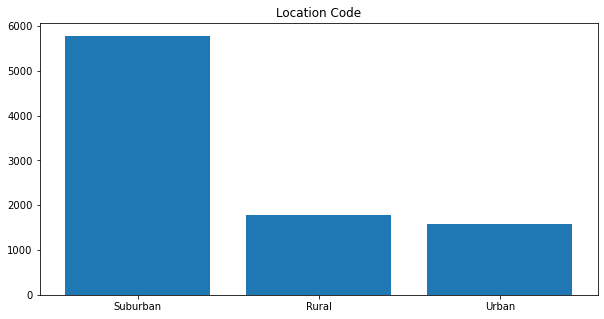

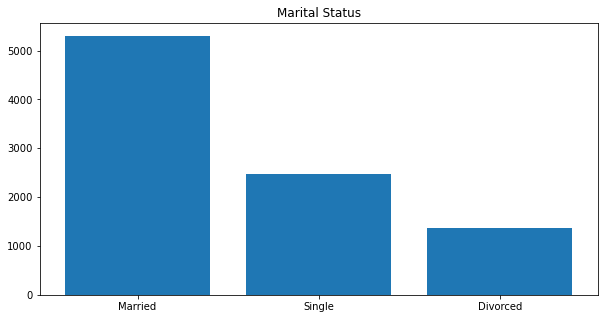

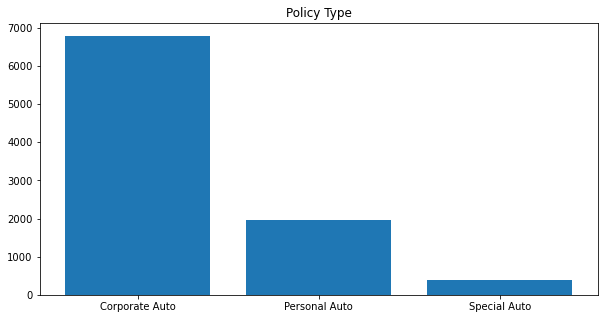

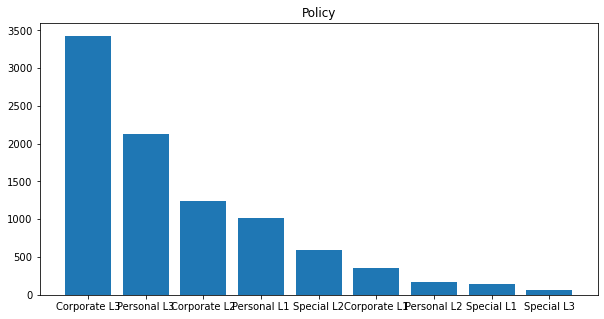

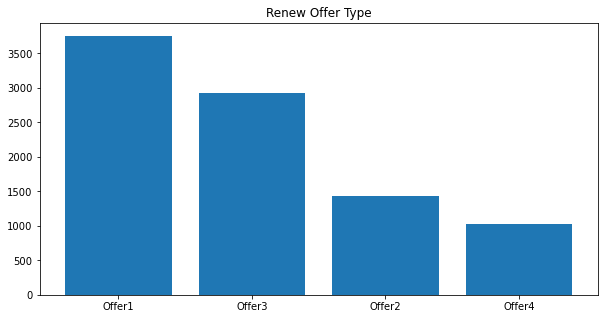

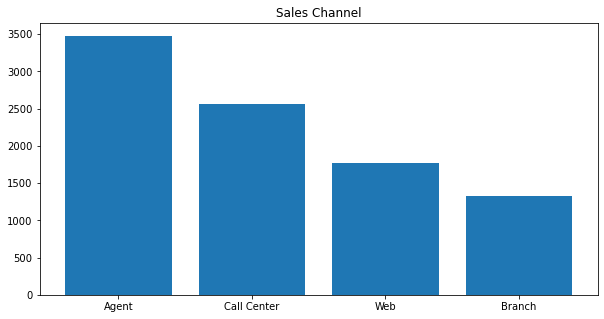

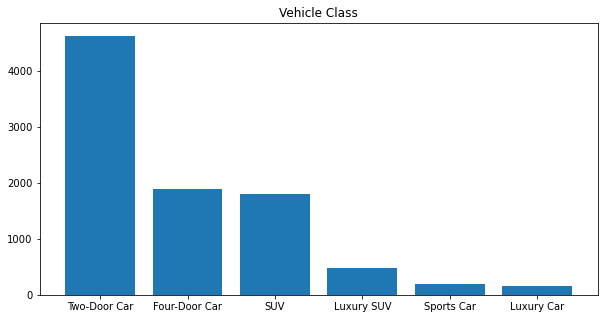

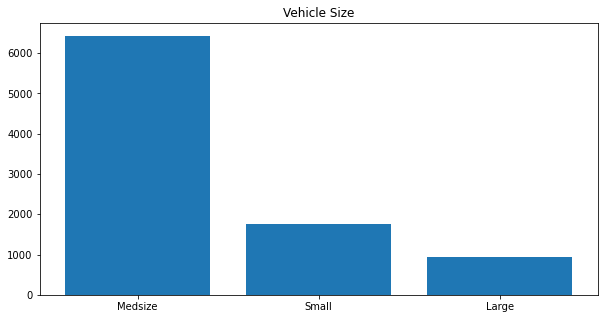

In [24]:
for c in cat_cols:
    plt.figure(figsize=(10,5))
    plt.bar(df1[c].unique(), df1[c].value_counts())
    plt.title(c)
    plt.show();